## Visualizations
(provided by Paul Moore - moorep@maths.ox.ac.uk)

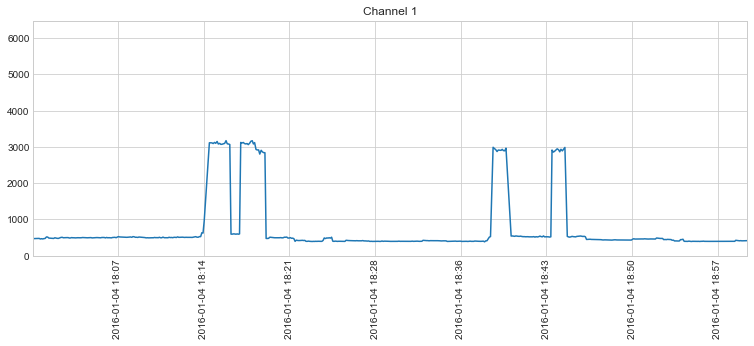

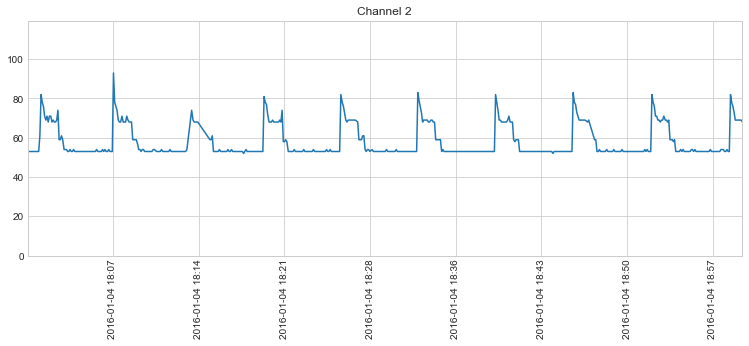

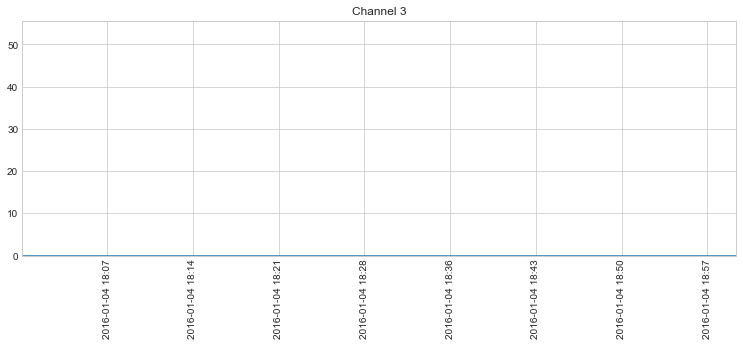

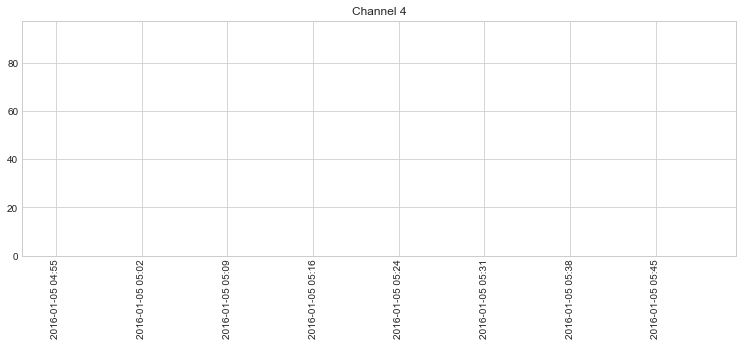

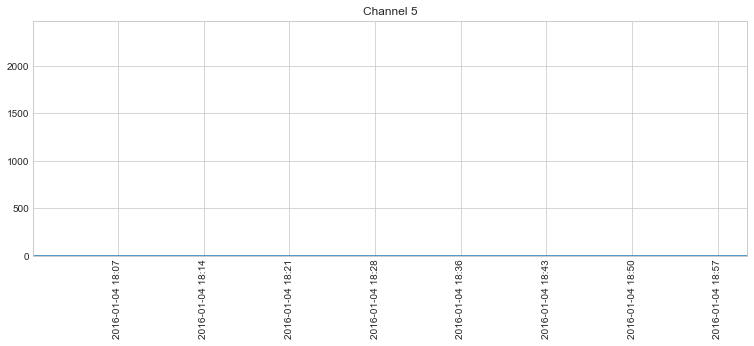

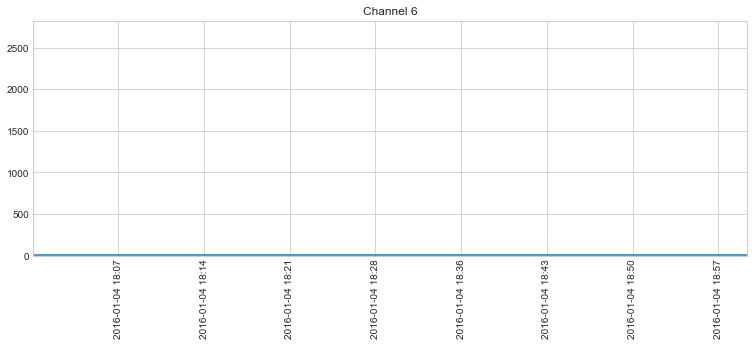

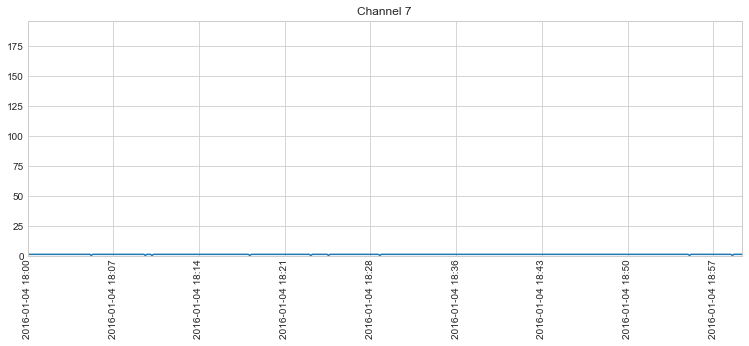

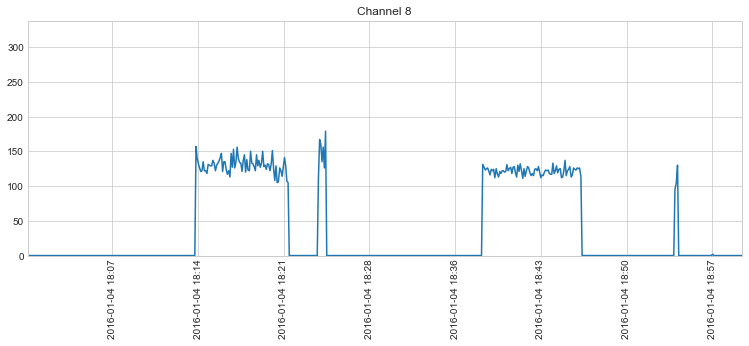

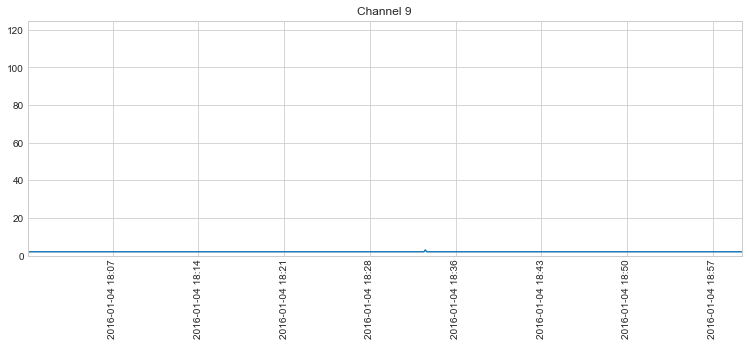

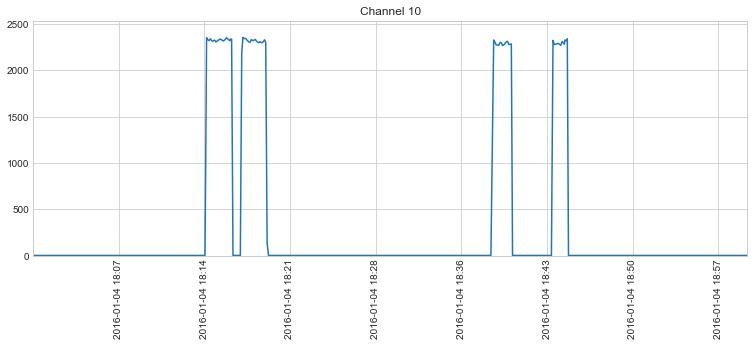

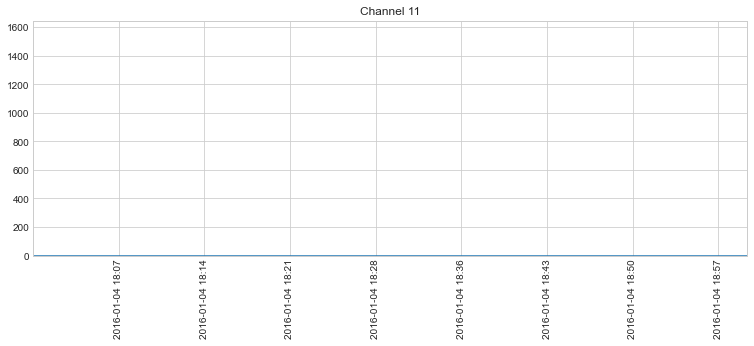

KeyboardInterrupt: 

In [1]:
%matplotlib inline
import time
import datetime as dt
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
from IPython.display import clear_output

# select the appliance - see Notes on Dale data.docx for list
for channel in range(1,26):
    if channel in [16,20,22,23,30,31,38,40,41,52]:
        continue

    # location of low freqency data - havok
    # fnstem_slow_data = "/scratch/moorep/dale/house_1/channel_"

    # location of low freqency data - local
    fnstem_slow_data = "D:/flep/ukdale/house_1/channel_"

    fn_dat = fnstem_slow_data + str(channel) + ".dat"

    # set time interval - the dat file covers a long period
    ts_day = time.mktime(dt.date(2016,1,4).timetuple())
    ts_next_day = ts_day + 24*3600 

    # read appliance (also called disaggregated) data
    df = pd.read_csv(fn_dat,' ') 
    df.columns = ['ts','watts']
    df = df.loc[(df['ts']>=ts_day) & (df['ts']<ts_next_day),:]

    # format dates
    timestamps=df['ts']
    dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
    datenums=md.date2num(dates)

    # set x limits for plotting
    hour_start = 18
    interval_length_in_hours = 1
    xlim1 = datenums[0]+hour_start/24; # start time
    xlim = np.array([xlim1, xlim1+interval_length_in_hours/24]) 

    # set y limits for plotting
    ylim2 = np.max(df['watts'])*1.05

    # plot
    fig = plt.figure(figsize = [12.8, 4.8])
    plt.style.use('seaborn-whitegrid')
    plt.subplots_adjust(bottom=0.2)
    plt.xticks( rotation=90 )

    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_xlim(xlim)
    ax.set_ylim([0,ylim2])
    plt.title("Channel %d"%(channel))
    ax.plot(datenums,df['watts'])
    plt.show()
    #fig.savefig('dale.png')

